In [27]:
%load_ext autoreload
%autoreload 2
import pickle as pkl

import context_distribs as cd
import display as d
import distances as dist

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cat = "full"

In [ ]:
(context_pcts, _, context_counts, _, _) = cd.genWordWindowContextDistribsStartToEnd(f"{cat}", frame=10, start_ind=0, end_ind=3000, 
                                                        top_m=10000, sample_equally=True, min_count=6000)

In [2]:
try:
    context_counts
except NameError:
    raise ValueError("Not defined")

with open(f"objects/{cat}/context_counts.pkl", "wb") as f:
    pkl.dump(context_counts, f)

ValueError: Not defined

In [4]:
with open(f"objects/{cat}/{cat}_wordcount_window.pkl", "rb") as f:
    wordcount_window = pkl.load(f)

In [5]:
with open(f"objects/{cat}/context_counts.pkl", "rb") as f:
    context_counts = pkl.load(f)

context_pcts = context_counts / context_counts.sum(axis=-1, keepdims=True)

In [6]:
full_plugin_entropy = cd.entropy_by_last_dim(cd.nonzeroify(context_pcts))

(14, 1093, 10000)
(14, 1093)


In [ ]:
full_nsb_entropy = cd.nsb_entropy_last_dim(context_counts)

In [31]:
recent_nsb_entropy = full_nsb_entropy[9:,:]

In [25]:
before_ent, after_ent = dist.make_shift_row_arrs(full_nsb_entropy)
ent_change = after_ent - before_ent

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     410.7
Date:                Wed, 24 May 2023   Prob (F-statistic):           4.92e-90
Time:                        19:46:49   Log-Likelihood:                 15344.
No. Observations:               14209   AIC:                        -3.068e+04
Df Residuals:                   14207   BIC:                        -3.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4481      0.021     21.038      0.0

(-0.5, 0.5)

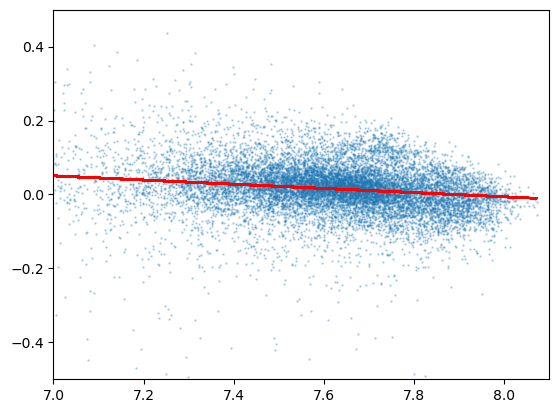

In [44]:
fig, ax = d.scatter(before_ent.flatten(), ent_change.flatten(), include_regression=True) #, average_bins=50)
ax.set_xlim(left=7, right=8.1)
ax.set_ylim(bottom=-0.5, top=0.5)

In [33]:
before_rec_ent, after_rec_ent = dist.make_shift_row_arrs(recent_nsb_entropy)
rec_ent_change = after_rec_ent - before_rec_ent

[ 0.15374852 -0.01338473 -0.00998857  0.04372006 -0.027449    0.03520651
  0.02618222  0.08902623  0.09180863 -0.02204905  0.03432871 -0.07793454
 -0.07216115]


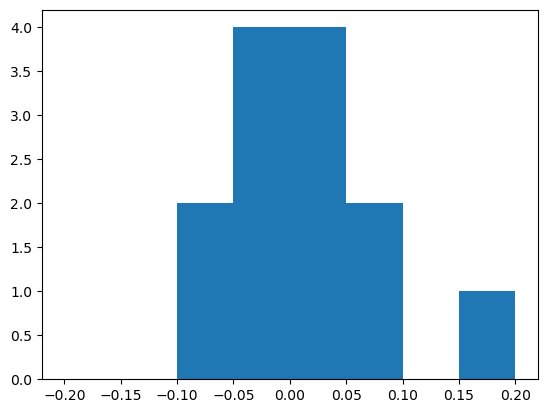

x
[ 0.03574018 -0.03776408  0.05410373 -0.10492781  0.02088463 -0.12010361
 -0.16450082  0.18385926 -0.00666877  0.21285498  0.06135775  0.00320175
  0.02127642]


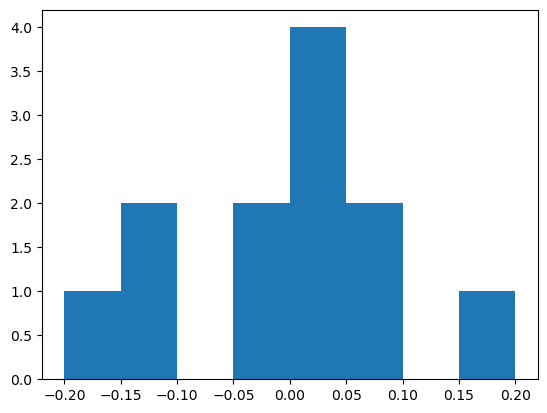

x
[ 0.08062595 -0.00037022  0.04355207 -0.00687737  0.05414327  0.01104223
 -0.00518018  0.14723969  0.0435088  -0.0115934  -0.00957464 -0.08745358
  0.01045118]


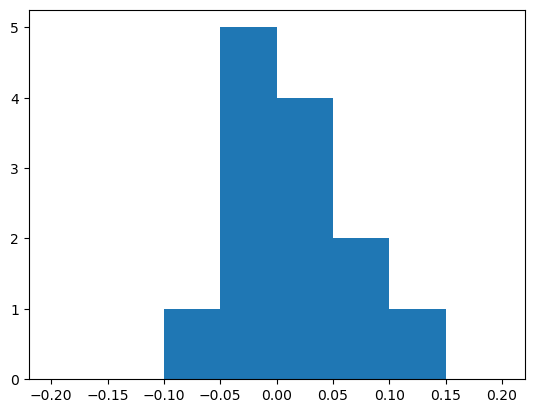

x
[ 0.03199959 -0.00423753  0.04547647  0.03704221  0.08581274 -0.02435821
  0.01773819  0.12747043  0.05457367  0.05137199 -0.0198158  -0.02897841
 -0.0006978 ]


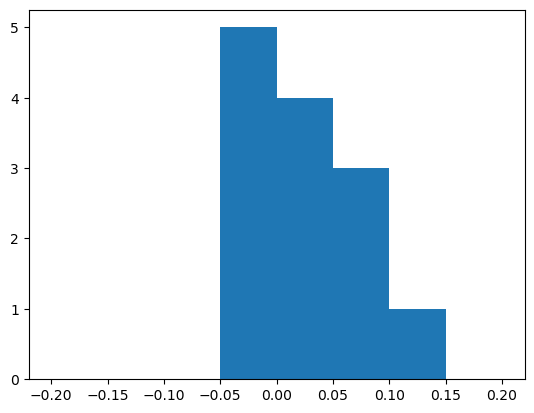

x
[ 0.00951837  0.00977023  0.03900686 -0.01970181  0.02794157 -0.01589133
  0.03814612  0.11040367  0.04116229 -0.01089042 -0.04102597 -0.10764535
 -0.02061211]


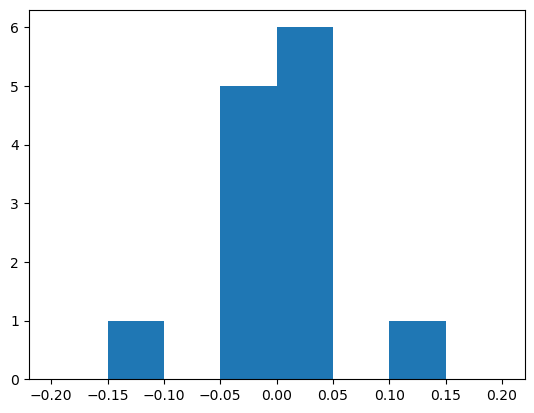

x
[-0.04310058  0.11102743  0.02250905 -0.04041041  0.07479153  0.0144113
  0.03182893  0.08011075  0.06328879 -0.02085557 -0.00180061 -0.03167573
 -0.05237228]


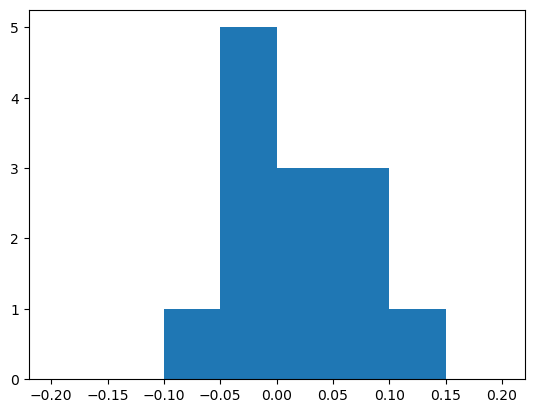

x
[-0.02878037  0.00089902  0.03324995  0.01616245  0.06467997  0.00946615
  0.02167519  0.11558416  0.07799813  0.01625882  0.00916878 -0.03131064
 -0.06336531]


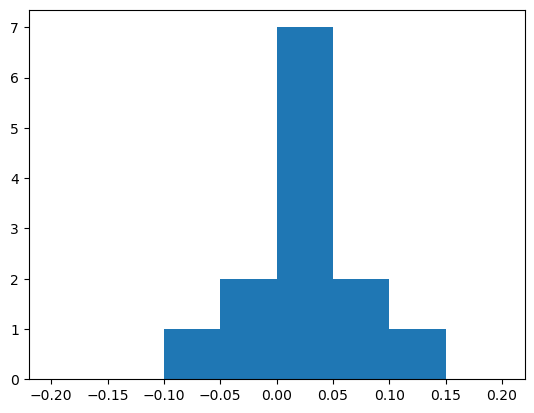

x
[ 0.0515906   0.02139628  0.03873572  0.03531671  0.06182098  0.01812626
  0.03116476  0.1040252   0.06531155  0.01964269 -0.0122388  -0.02635991
  0.00324529]


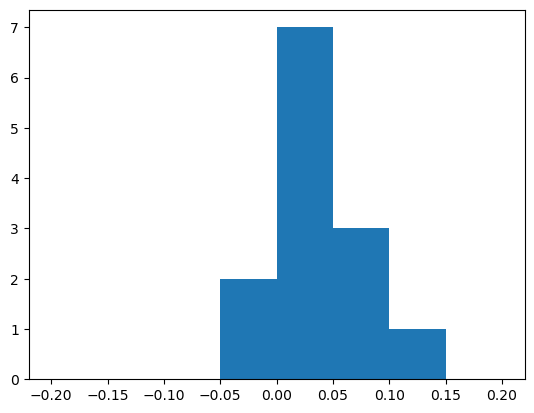

x
[ 0.03277689 -0.00833163  0.03753877  0.0281283   0.03219683 -0.00142649
  0.03513208  0.0801844   0.0634714   0.05321335 -0.00503978 -0.05591832
 -0.03772086]


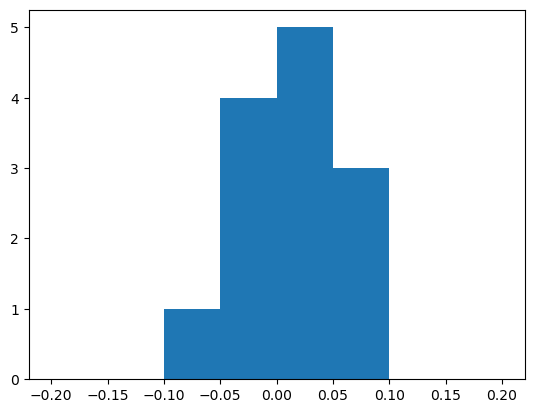

x
[ 0.03291284  0.07271662 -0.00793134  0.00846275  0.03436014  0.02562477
  0.02271017  0.12432716  0.03693073  0.0100599   0.05785733 -0.06777063
  0.00965166]


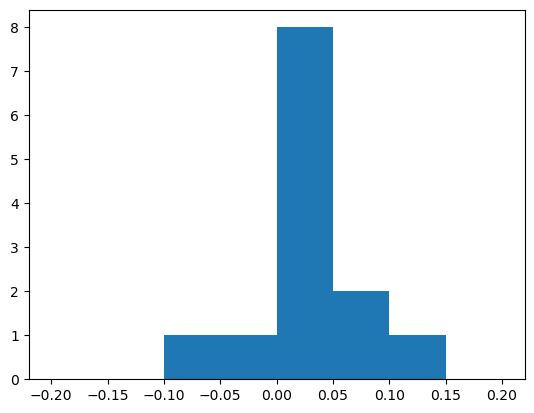

x
[ 0.02039853  0.01778859  0.03214604  0.00590485  0.03296128  0.02210923
  0.01996359  0.09038007  0.08593643 -0.02702245  0.01864819 -0.12758577
 -0.00901203]


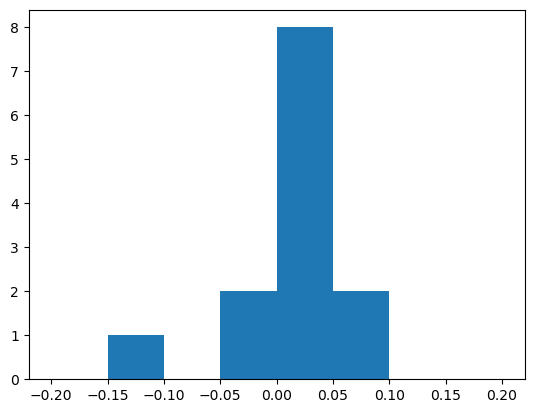

x
[ 0.07972853 -0.02148904  0.02744158  0.03038695  0.00233676  0.05495064
 -0.0418523   0.18933307  0.06111938  0.00079196  0.02376025 -0.04326898
  0.0135845 ]


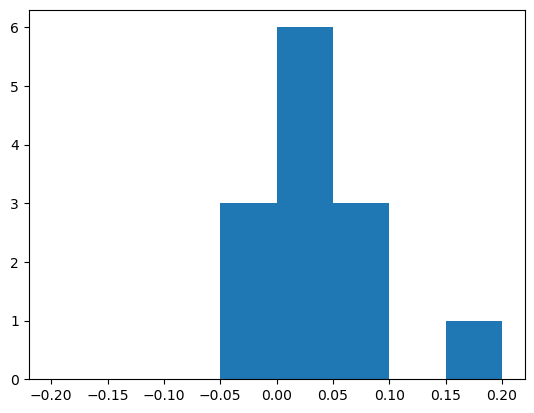

x
[ 0.03286863  0.02934377  0.01815224  0.00966976  0.01803374  0.01722692
 -0.02032301  0.14383135  0.02299017  0.0328876   0.02979473 -0.07262958
 -0.05071602]


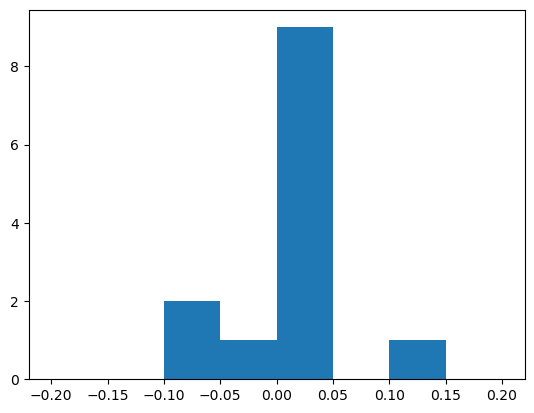

x
[ 0.05840735  0.00210938  0.03394524 -0.00916095  0.04736953  0.05010875
  0.01851826  0.12637957  0.03202847  0.0182048  -0.01004747 -0.0827158
  0.00636602]


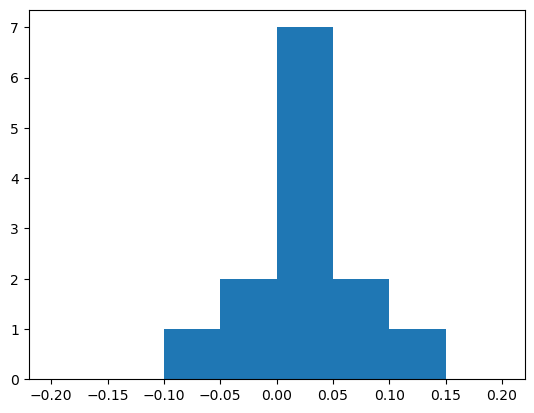

x
[ 0.08164082  0.0358674  -0.01869     0.00460007  0.05642682  0.03044799
  0.05015313  0.09005321  0.02522729 -0.05473162  0.03920779 -0.02024211
  0.05328962]


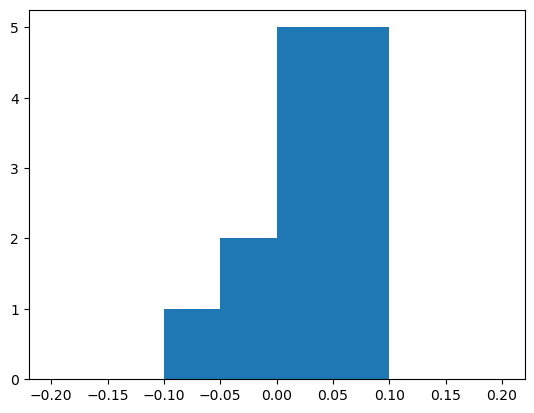

x
[ 0.02215265  0.0024507   0.03159219 -0.02323599  0.02367485 -0.02467333
  0.05635318  0.11206933  0.04352041 -0.04622937 -0.05092094 -0.09762451
  0.01708131]


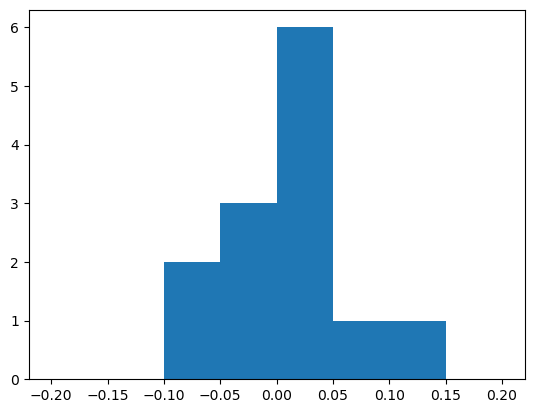

x
[ 0.04508047  0.03407586  0.01199305 -0.0111802   0.00714823  0.05152791
  0.00624145  0.08100487  0.04935901 -0.0656458  -0.03199096 -0.0626803
 -0.01053699]


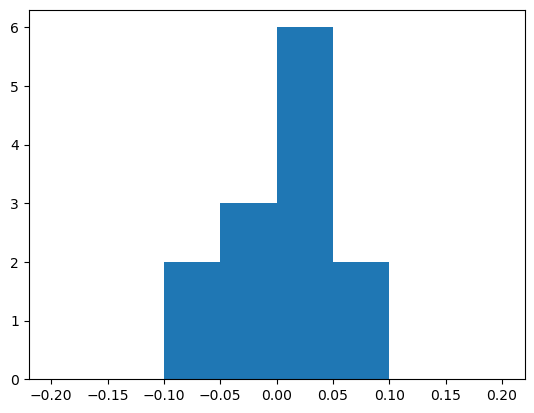

x
[ 0.0724598   0.01883299  0.03053367 -0.00680219  0.03830289  0.01459737
  0.00759288  0.13148392  0.04692391 -0.00118417  0.0198035  -0.03681248
 -0.01563539]


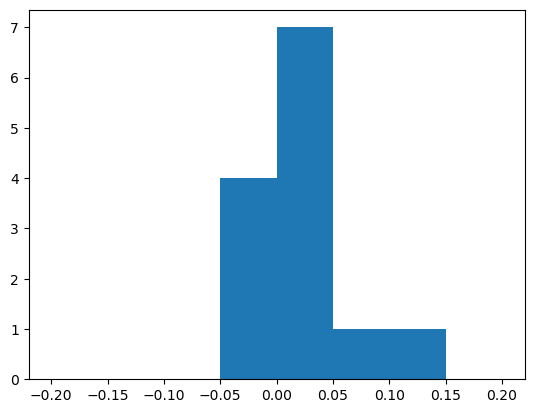

x
[ 0.00882022  0.01836568 -0.00112196  0.02149735  0.01538577 -0.00275735
  0.03701364  0.11582354  0.0434807  -0.01996342 -0.0435784  -0.09956124
 -0.02758056]


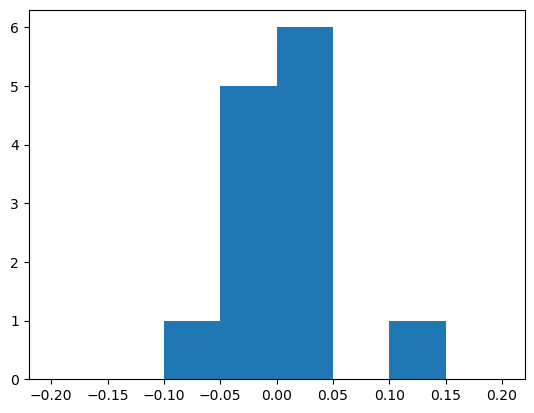

x
[ 0.05346788 -0.01278113  0.00819852  0.02755309  0.00339255  0.01226919
 -0.02585958  0.12617966  0.03697144 -0.0497311  -0.05193108 -0.03027217
 -0.02727388]


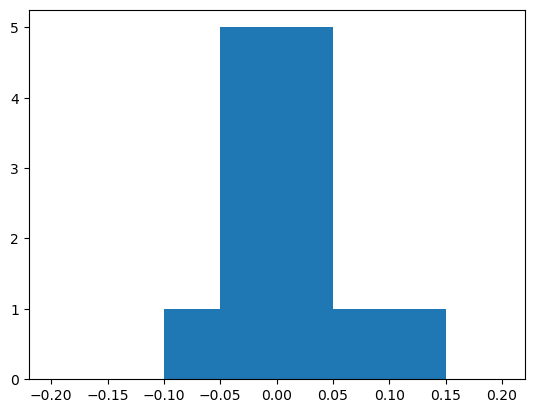

x
[ 0.03191676  0.01256494  0.02310327 -0.0080889   0.04313808  0.00553707
  0.00533899  0.10665229  0.04884064  0.01534708 -0.03028161 -0.05283489
 -0.01449398]


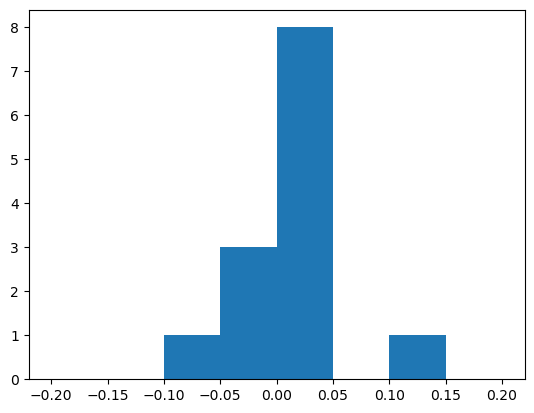

x
[ 0.0451141   0.03669546  0.0137239   0.01444042  0.01553062  0.0383351
  0.0091604   0.12628948  0.05391933 -0.05450926 -0.01719786 -0.09438059
 -0.02136367]


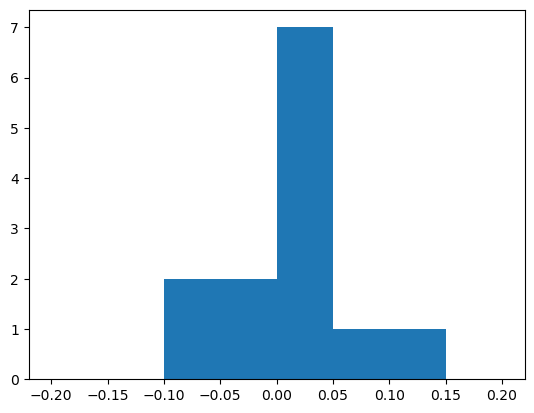

x
[ 0.02988654 -0.00844255 -0.02260284  0.06632561  0.06675355  0.03224134
  0.00087589  0.05716604  0.06721379  0.02273985  0.03463349  0.01527548
 -0.0835546 ]


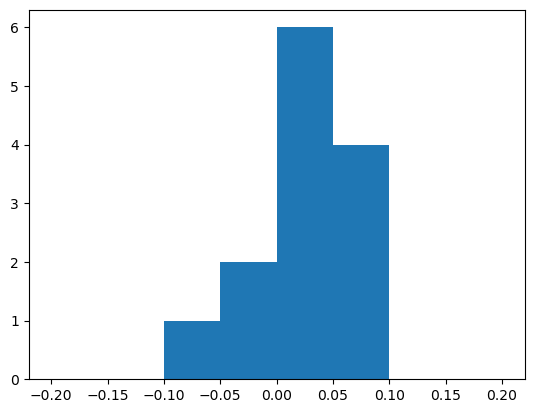

x
[-0.04087896  0.05839912 -0.0243741   0.03232983  0.07251552 -0.01667874
  0.05789843  0.11154564  0.04197606 -0.02510097 -0.0500634  -0.10768541
 -0.05098087]


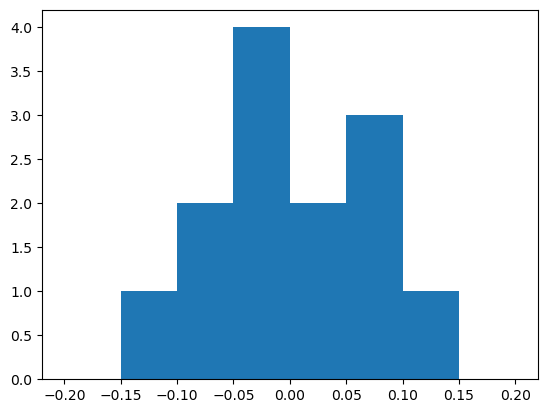

x
[ 0.02256487  0.02161737  0.01895673  0.02121864  0.03340602  0.05364976
 -0.0015115   0.159278    0.03309671  0.00550231  0.01143625 -0.09761468
 -0.09384726]


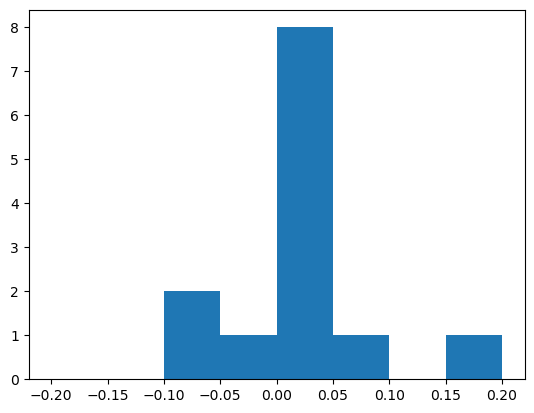

x
[ 0.07868469 -0.02408195 -0.01263208  0.02532339  0.02399317  0.08914294
  0.04553281  0.11078345  0.06026138 -0.00327187  0.03119748 -0.07339106
  0.03603932]


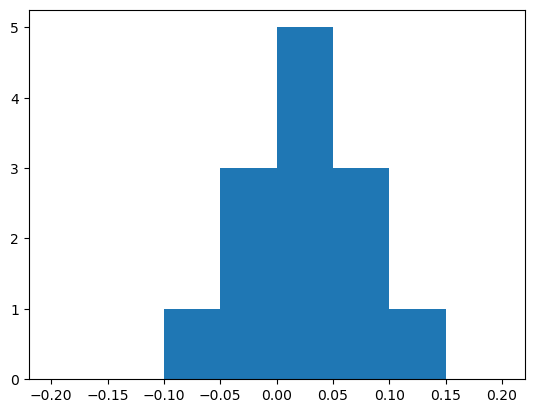

x
[ 0.06458863  0.01215421 -0.00809838  0.05157496  0.02947141 -0.00391624
  0.00661963  0.11874249  0.04684933  0.00215549  0.04033552 -0.06545917
 -0.01252219]


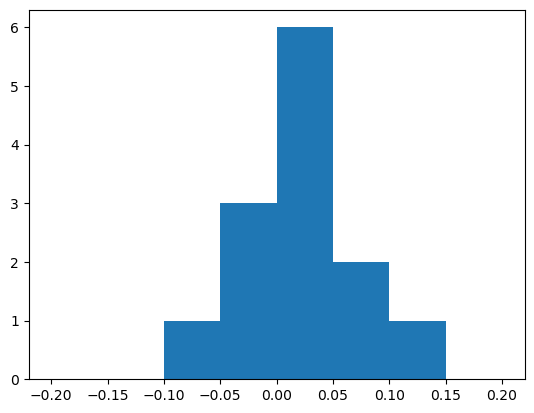

x
[ 0.08241636  0.0470463   0.00026124  0.05596119  0.02641585  0.0093379
  0.01345559  0.10886665  0.05512038 -0.00125523  0.00341301 -0.05722462
  0.00406648]


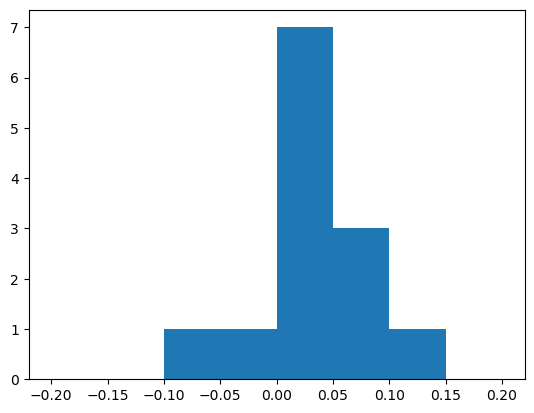

x
[ 0.04339158  0.01102024 -0.00014364 -0.00254257  0.008472    0.03591733
  0.02427385  0.13019997  0.06870129 -0.02059025 -0.01550958 -0.05481828
 -0.04179167]


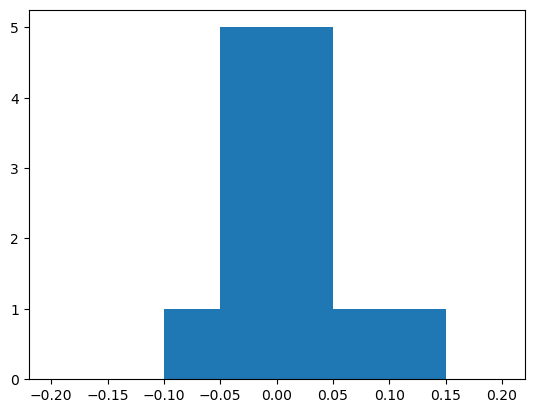

x
[ 0.02500924  0.01037479  0.00603412 -0.00506754  0.04941133  0.00206908
 -0.04464507  0.12064088  0.01618666  0.03339643 -0.04313    -0.07713679
 -0.02916064]


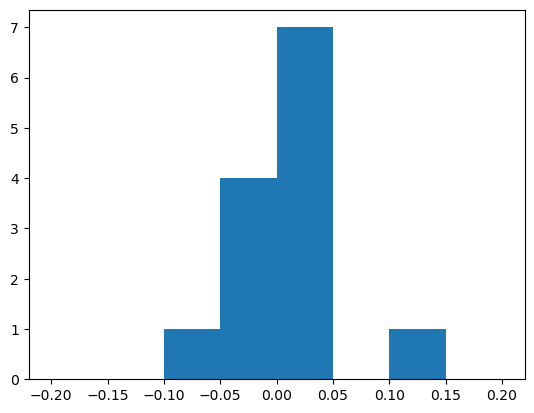

x
[ 0.0580184   0.00176794  0.01277021  0.02618427  0.00018947  0.03731946
  0.0200837   0.12434225  0.04752231 -0.05635761 -0.00230741 -0.05917256
 -0.05792928]


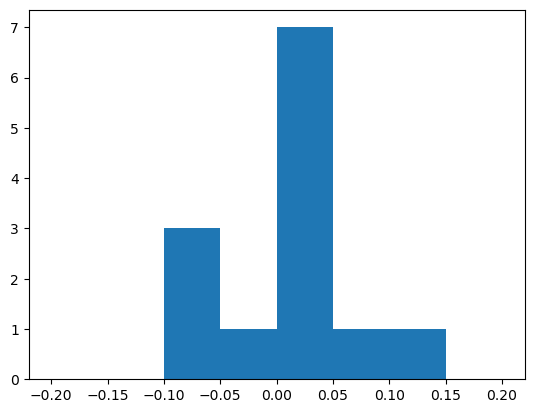

x
[ 0.04592033  0.02620699  0.00708456 -0.02362203  0.03211001  0.037486
  0.0185709   0.07274589  0.06501918  0.00478682 -0.01482574 -0.02925007
 -0.0468112 ]


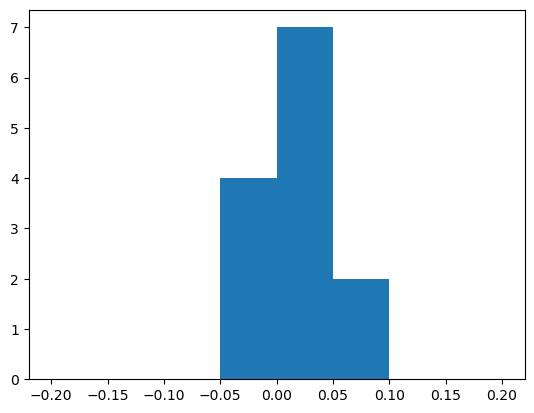

x
[ 0.08493711  0.01604015  0.03511203 -0.00415273  0.0478398   0.00549369
  0.00026786  0.12564899  0.01230787 -0.05355137 -0.01565458 -0.04961021
 -0.04126949]


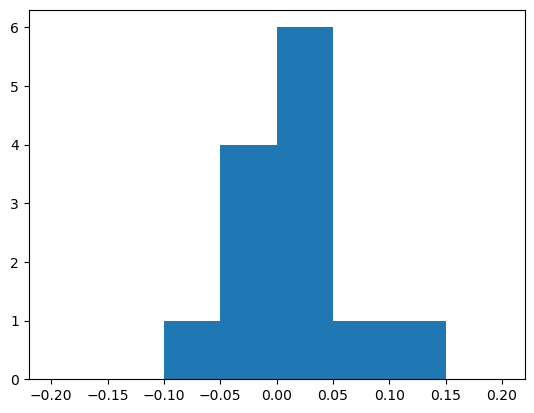

x
[ 0.00067166  0.0603301   0.01578596  0.05029462  0.03278888  0.02214501
 -0.03073481  0.09751339  0.05325424  0.00303105  0.02274652 -0.05593307
  0.0175752 ]


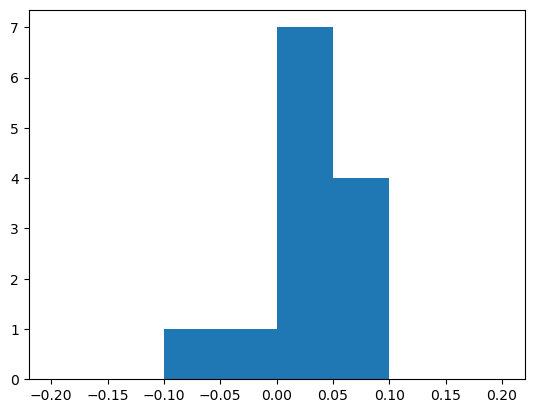

x
[ 0.05721115 -0.0171503  -0.01109037  0.03247597 -0.00712143  0.07169808
  0.01176934  0.09875335  0.03500696 -0.05662167 -0.03300833 -0.06949384
 -0.04423685]


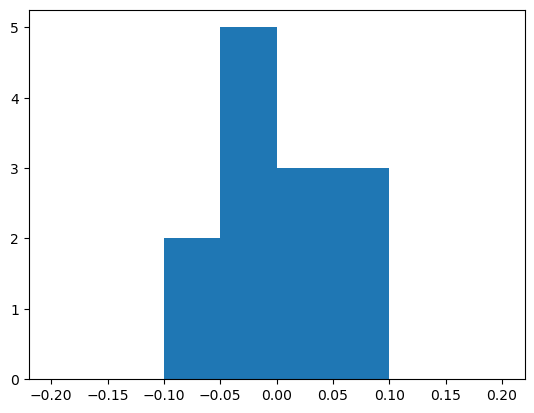

x
[ 0.04766692  0.11768122 -0.01275171  0.02628297  0.04098716 -0.0050307
  0.01881568  0.16493586  0.03871753 -0.01233773  0.03326646 -0.09337582
  0.01864031]


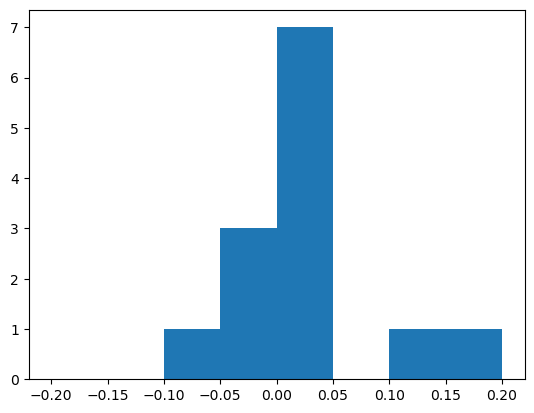

x
[ 0.08547259  0.01952808 -0.04771384  0.03221908  0.04797866  0.02526128
  0.04467378  0.12775648  0.04721828 -0.04903935 -0.01048819 -0.02401803
  0.0007752 ]


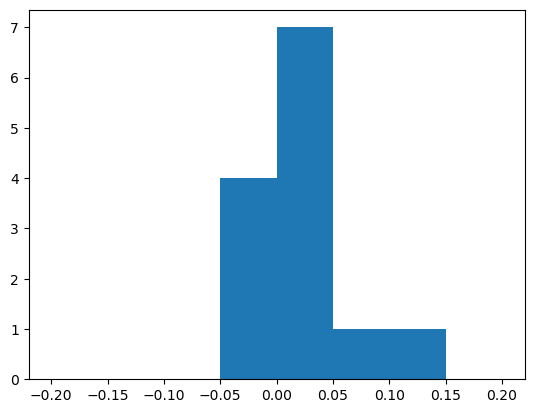

x
[-0.04825864  0.02942698  0.00414473 -0.01078277 -0.04985465 -0.22437228
  0.08413504 -0.02386982 -0.06297278  0.19402652  0.11283829  0.06123156
 -0.04647496]


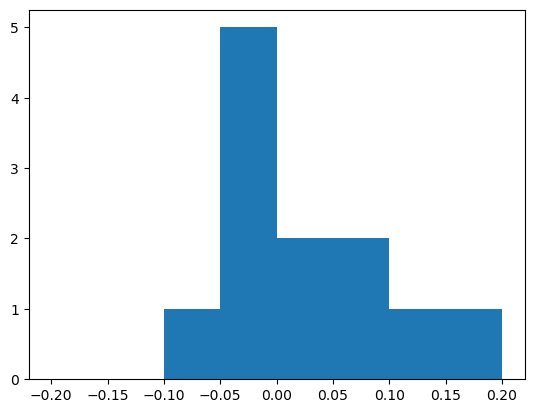

x
[ 0.00871939  0.03832588  0.01844172  0.03686608  0.03452857 -0.01986602
  0.01122531  0.11128701  0.0466113  -0.01578714 -0.04028767 -0.08834702
 -0.01576204]


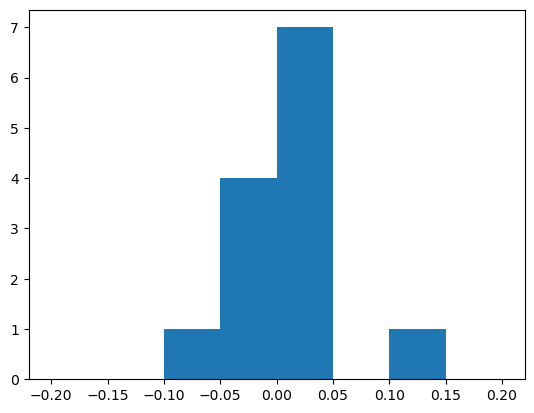

x
[ 0.01580826 -0.0114036  -0.00416055 -0.00859364 -0.01062054  0.02242823
  0.00837332  0.10110951  0.03657556 -0.13892729 -0.04948371 -0.05088619
 -0.03245073]


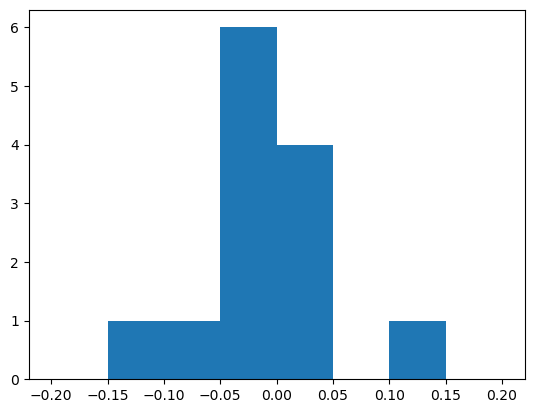

x
[ 0.07267512  0.06647987  0.05750899 -0.00557363 -0.00198539  0.04893599
 -0.02892237  0.13365535  0.09971606 -0.04729148 -0.0145144  -0.05909104
 -0.1391    ]


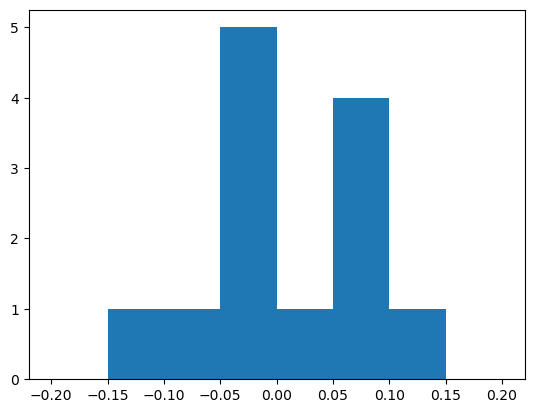

x
[ 0.06205532  0.01668857  0.02807866 -0.02504773  0.02082315  0.04369785
 -0.0072873   0.12671153  0.07362946 -0.05012507  0.01831245 -0.0965487
  0.00267705]


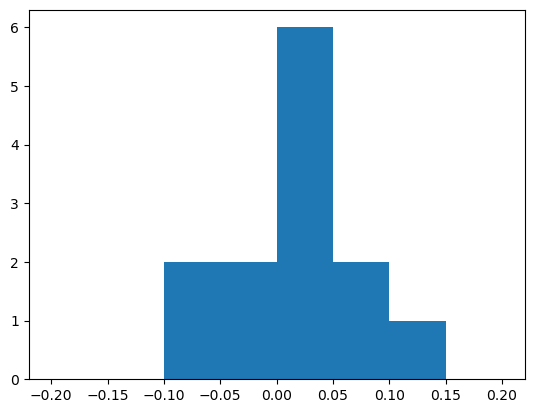

x
[ 0.05066441  0.03526815  0.02246435 -0.01607304  0.03509194  0.00910618
  0.02225975  0.118306    0.02621715  0.00703882 -0.01906649 -0.05490137
 -0.03977742]


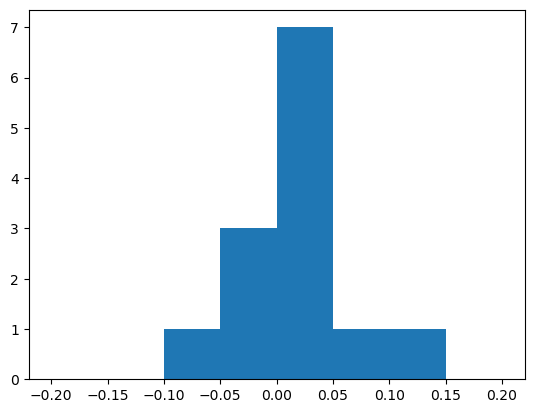

KeyboardInterrupt: Interrupted by user

In [53]:
for i in range(ent_change.shape[1]):
    print(ent_change[:,i])
    plt.hist(ent_change[:,i], bins=[-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2])
    plt.show()
    y = input("x")

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.300e+01, 1.500e+01, 2.300e+01, 6.800e+01,
        9.600e+01, 1.490e+02, 3.740e+02, 1.221e+03, 2.945e+03, 5.438e+03,
        3.907e+03, 1.044e+03]),
 array([4.50980311, 4.68789948, 4.86599585, 5.04409222, 5.2221886 ,
        5.40028497, 5.57838134, 5.75647771, 5.93457409, 6.11267046,
        6.29076683, 6.4688632 , 6.64695957, 6.82505595, 7.00315232,
        7.18124869, 7.35934506, 7.53744144, 7.71553781, 7.89363418,
        8.07173055]),
 <BarContainer object of 20 artists>)

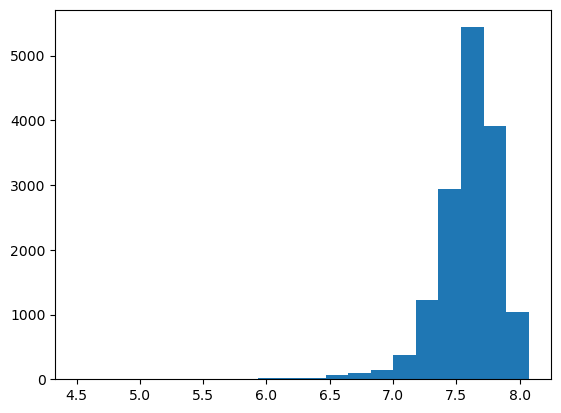

In [55]:
fig, ax = plt.subplots()
ax.hist(full_nsb_entropy.flatten(), bins=20)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Entropy change since recently'}>)

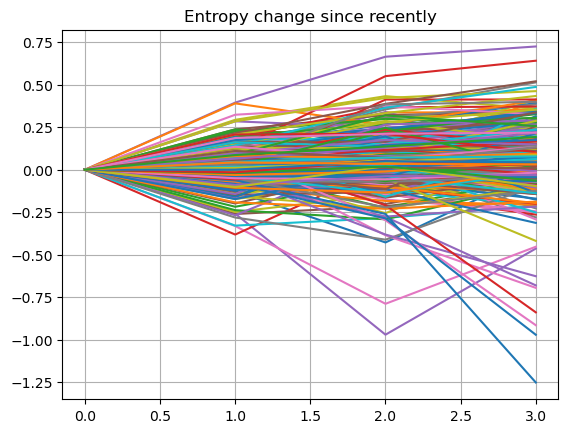

In [20]:
d.plot_column_change(full_plugin_entropy[1:5], title="Entropy change since recently")

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Entropy change over time'}>)

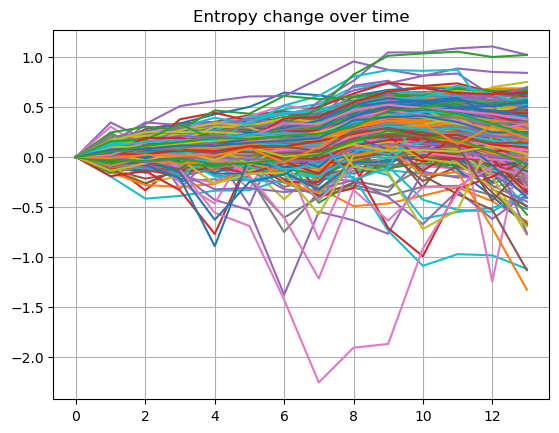

In [9]:
d.plot_column_change(full_nsb_entropy, title="Entropy change over time")

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Entropy change over time'}>)

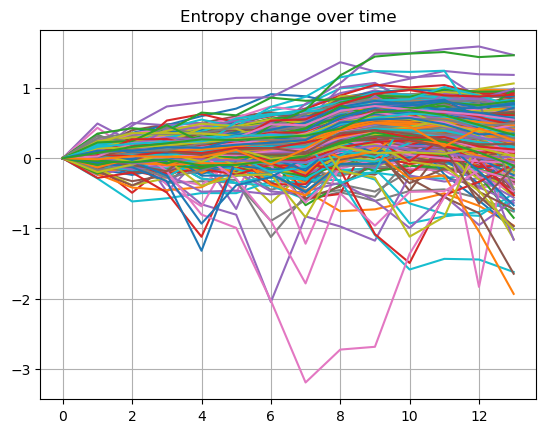

In [10]:
d.plot_column_change(full_plugin_entropy, title="Entropy change over time")